In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


In [2]:
merged_df = pd.read_csv("/Users/swarchol/Research/seal/data/dan1/merged_clustered.csv")

19it [00:09,  2.02it/s]


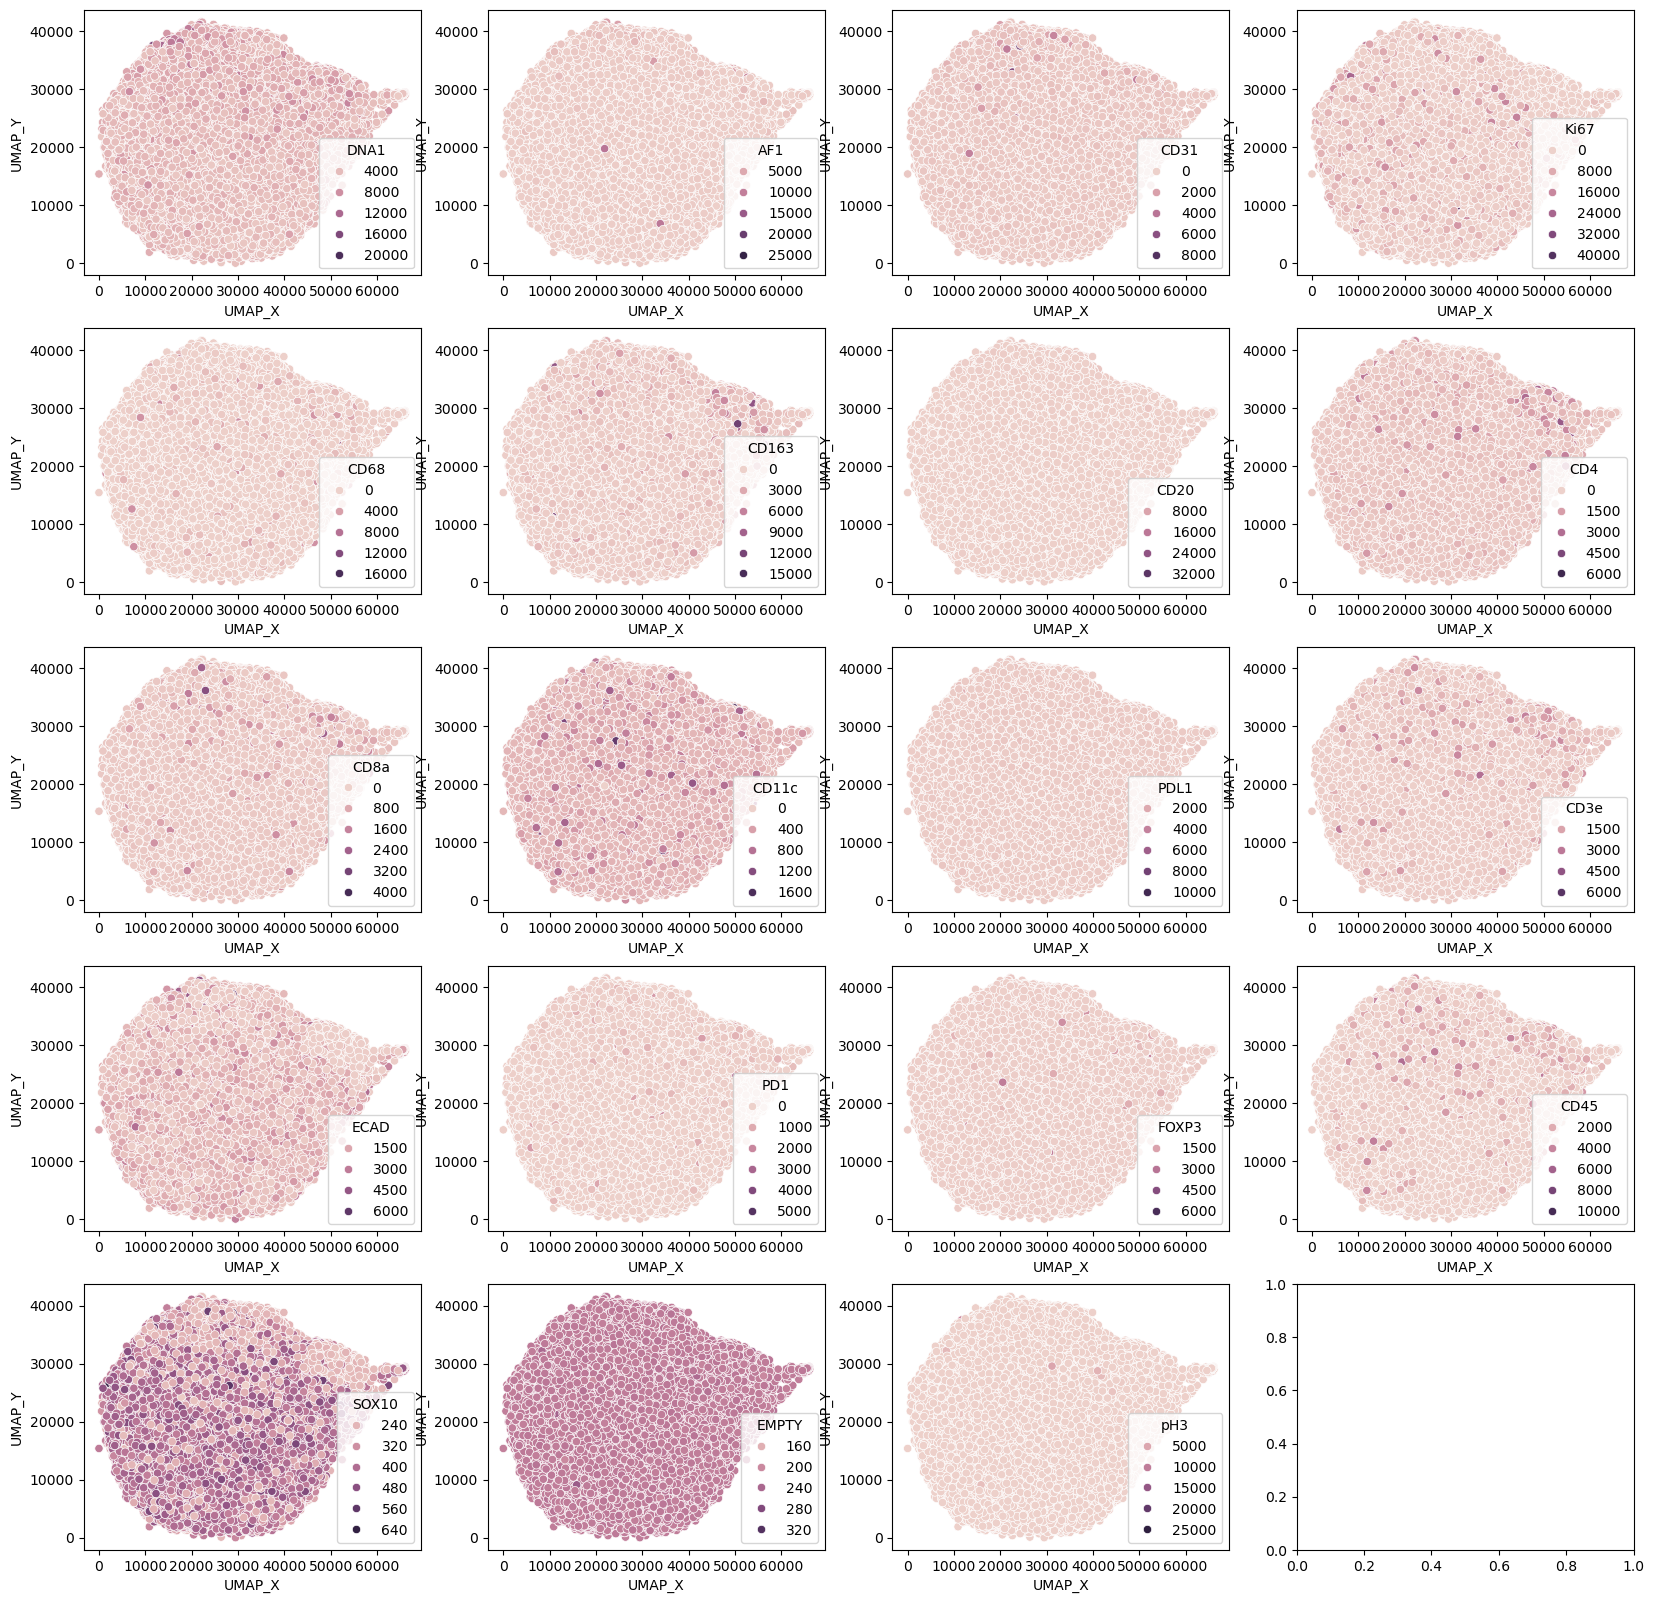

In [3]:
feature_columns = ['DNA1', 'AF1', 'CD31', 'Ki67', 'CD68', 'CD163', 'CD20', 'CD4',
       'CD8a', 'CD11c', 'PDL1', 'CD3e', 'ECAD', 'PD1', 'FOXP3', 'CD45',
       'SOX10', 'EMPTY', 'pH3']

# Plot a grid of scatterplots for each feature, showing UMAP coordinates and color by feature value

# Create a grid of subplots
n_features = len(feature_columns)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for i, feature in tqdm(enumerate(feature_columns)):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.scatterplot(data=merged_df, x='UMAP_X', y='UMAP_Y', hue=feature, ax=ax)

8it [00:04,  1.98it/s]


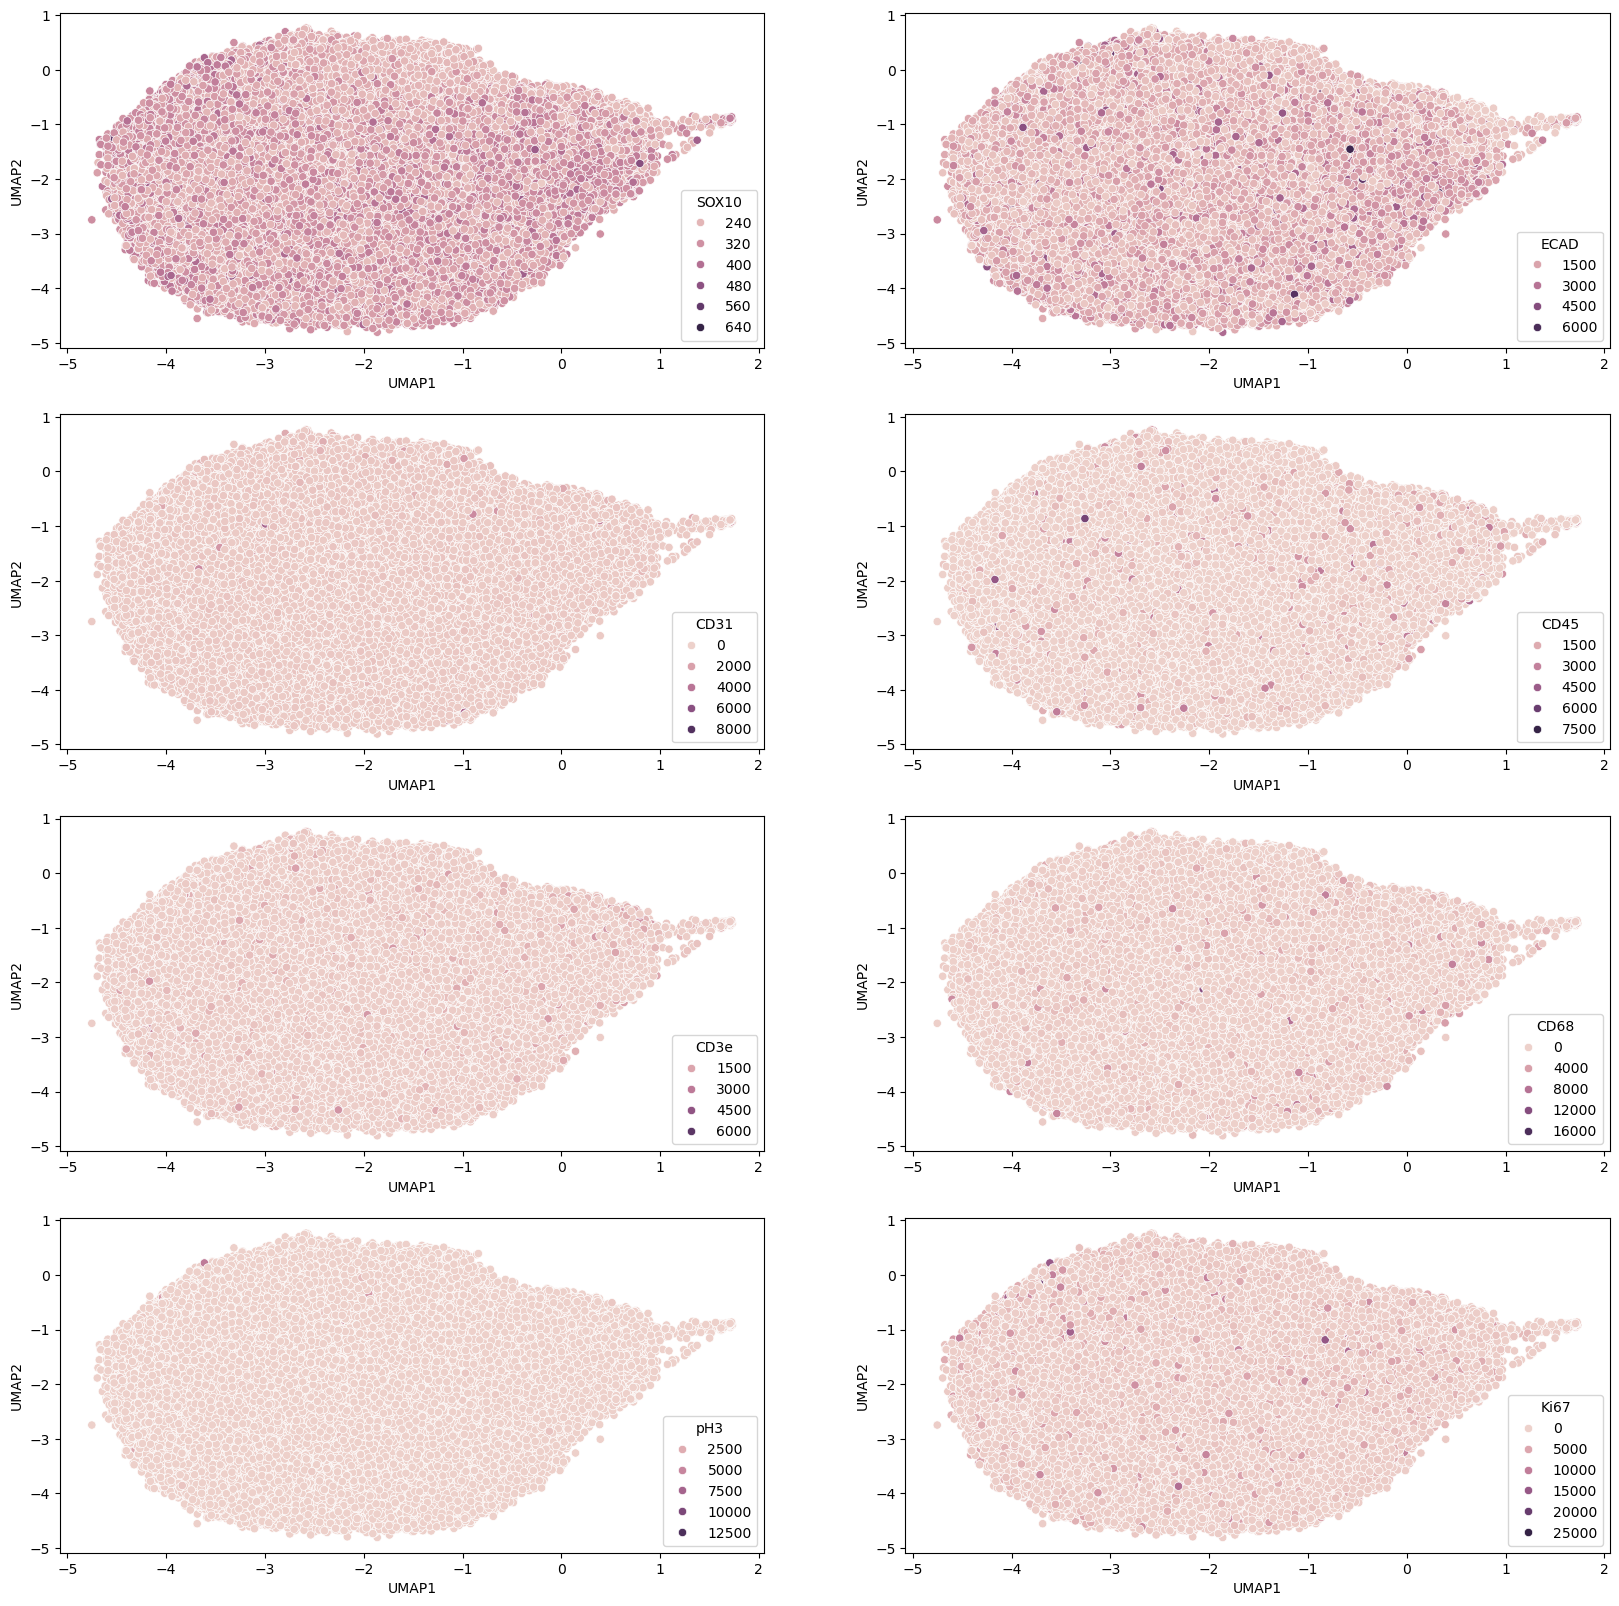

In [5]:
dan_csv = pd.read_csv("/Users/swarchol/Downloads/vae_output_CellIDs2.csv")
feature_columns = ['SOX10', 'ECAD', 'CD31', 'CD45', 'CD3e', 'CD68', 'pH3', 'Ki67']


# Create a grid of subplots
n_features = len(feature_columns)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for i, feature in tqdm(enumerate(feature_columns)):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.scatterplot(data=dan_csv, x='UMAP1', y='UMAP2', hue=feature, ax=ax)


In [6]:
dan_csv

Unnamed: 0  CellID  X_centroid  Y_centroid       SOX10         ECAD  \
0               0  405116        6598       16892  325.473902  1243.211268   
1               1  241294       39667       11351  304.105048  1249.608458   
2               2  910294       48323       31591  364.294239  2248.753086   
3               3  942695       28861       32918  343.903023  1618.380353   
4               4   85703       57151        5776  251.146853   710.028971   
...           ...     ...         ...         ...         ...          ...   
99995       99995  971194       19539       35443  337.194882  2030.259843   
99996       99996  614212        9375       23800  320.472093  1434.060465   
99997       99997  496066       26352       20257  273.242466  1653.198630   
99998       99998  225020       23296       11275  257.516842   987.104211   
99999       99999  967695       16067       35997  270.587996   748.063072   

             CD31        CD45        CD3e        CD68  ...      z118  \
0      420.631317  250.910522  230.719138  230.723281  ...  0.308230   
1      292.065484  323.518417  236.904502  324.500682  ... -0.306394   
2      349.240741  269.251029  217.242798  214.500000  ... -0.026104   
3      335.214106  270.404282  218.824937  261.452141  ... -0.405178   
4      349.902098  273.075924  245.201798  301.242757  ...  0.109781   
...           ...         ...         ...         ...  ...       ...   
99995  342.379921  309.281496  217.017717  435.269685  ... -0.228702   
99996  274.823256  252.269767  221.098837  310.161628  ... -0.519391   
99997  293.984932  434.569863  229.153425  857.969863  ... -0.312877   
99998  315.110526  240.882105  226.186316  220.033684  ...  0.355842   
99999  383.960326  399.501526  226.796541  699.062055  ...  0.344508   

           z119      z120      z121      z122      z123      z124      z125  \
0     -0.184393 -0.495565  0.379404  0.669505 -0.638107 -0.609338 -0.302467   
1      0.399878  0.675126 -0.189866  0.001500  1.306547  0.962875 -0.454188   
2     -0.569511  0.009554 -0.194817 -0.063196  0.469071  0.838488  0.658541   
3      0.396906  2.403022 -0.548937  0.552754  1.170531 -0.766184 -0.841087   
4      0.241342  0.176212 -0.113401  0.777040 -0.402751  0.095172 -0.203196   
...         ...       ...       ...       ...       ...       ...       ...   
99995 -0.535651  0.189402 -0.859674  0.036682  0.949879 -0.546523 -0.333110   
99996  0.164003 -1.572520  0.804396 -0.008737 -0.050568 -0.963499 -0.378179   
99997  0.476043 -0.544612 -0.026738  0.706972  0.742318  0.188958 -0.535194   
99998  0.063896 -0.100322  0.223161  0.498169  0.188345  0.244238  0.943987   
99999  0.100166  0.440647  0.560839  1.002038 -0.212601 -0.385925  1.031812   

           z126      z127  
0      0.246378  0.400600  
1      0.343388  0.222866  
2      0.172603  0.049628  
3      0.379607 -0.212794  
4     -0.106790  0.593011  
...         ...       ...  
99995  0.156958  1.100661  
99996  0.001465 -0.248653  
99997 -0.305359 -0.174389  
99998 -0.619680 -0.541378  
99999 -0.870968 -0.069332  

[100000 rows x 142 columns]

In [9]:
# merged_df
# JOIN on CellID, appending 'dan_' to the column names
merged_df = merged_df.merge(dan_csv, on='CellID', suffixes=('', '_dan'))

# Plot a grid of scatterplots for each feature, showing UMAP coordinates and color by feature value

# Create a grid of subplots


In [12]:
for col in merged_df.columns:
    # if 'dan_' in col:
    print(col)

# Plot a grid of scatterplots for each feature, showing UMAP coordinates and color by feature value



CellID
DNA1
AF1
CD31
Ki67
CD68
CD163
CD20
CD4
CD8a
CD11c
PDL1
CD3e
ECAD
PD1
FOXP3
CD45
SOX10
EMPTY
pH3
X_centroid
Y_centroid
Area
MajorAxisLength
MinorAxisLength
Eccentricity
Solidity
Extent
Orientation
H&E R
H&E G
H&E B
IN
UMAP_X
UMAP_Y
cluster
Unnamed: 0
X_centroid_dan
Y_centroid_dan
SOX10_dan
ECAD_dan
CD31_dan
CD45_dan
CD3e_dan
CD68_dan
pH3_dan
Ki67_dan
UMAP1
UMAP2
z0
z1
z2
z3
z4
z5
z6
z7
z8
z9
z10
z11
z12
z13
z14
z15
z16
z17
z18
z19
z20
z21
z22
z23
z24
z25
z26
z27
z28
z29
z30
z31
z32
z33
z34
z35
z36
z37
z38
z39
z40
z41
z42
z43
z44
z45
z46
z47
z48
z49
z50
z51
z52
z53
z54
z55
z56
z57
z58
z59
z60
z61
z62
z63
z64
z65
z66
z67
z68
z69
z70
z71
z72
z73
z74
z75
z76
z77
z78
z79
z80
z81
z82
z83
z84
z85
z86
z87
z88
z89
z90
z91
z92
z93
z94
z95
z96
z97
z98
z99
z100
z101
z102
z103
z104
z105
z106
z107
z108
z109
z110
z111
z112
z113
z114
z115
z116
z117
z118
z119
z120
z121
z122
z123
z124
z125
z126
z127


In [13]:
# Drop all columns that start with z
merged_df = merged_df.drop(columns=[col for col in merged_df.columns if col.startswith('z')])

In [16]:
shared_columns = []
for col in merged_df.columns:
    # Check if the same column with _dan_ exists
    if f'{col}_dan' in merged_df.columns:
        shared_columns.append(col)

print(shared_columns)

# Drop all columns that start with z
# merged_df = merged_df.drop(columns=[col for col in merged_df.columns if col.startswith('z')])


['CD31', 'Ki67', 'CD68', 'CD3e', 'ECAD', 'CD45', 'SOX10', 'pH3', 'X_centroid', 'Y_centroid']


10it [00:00, 22.43it/s]


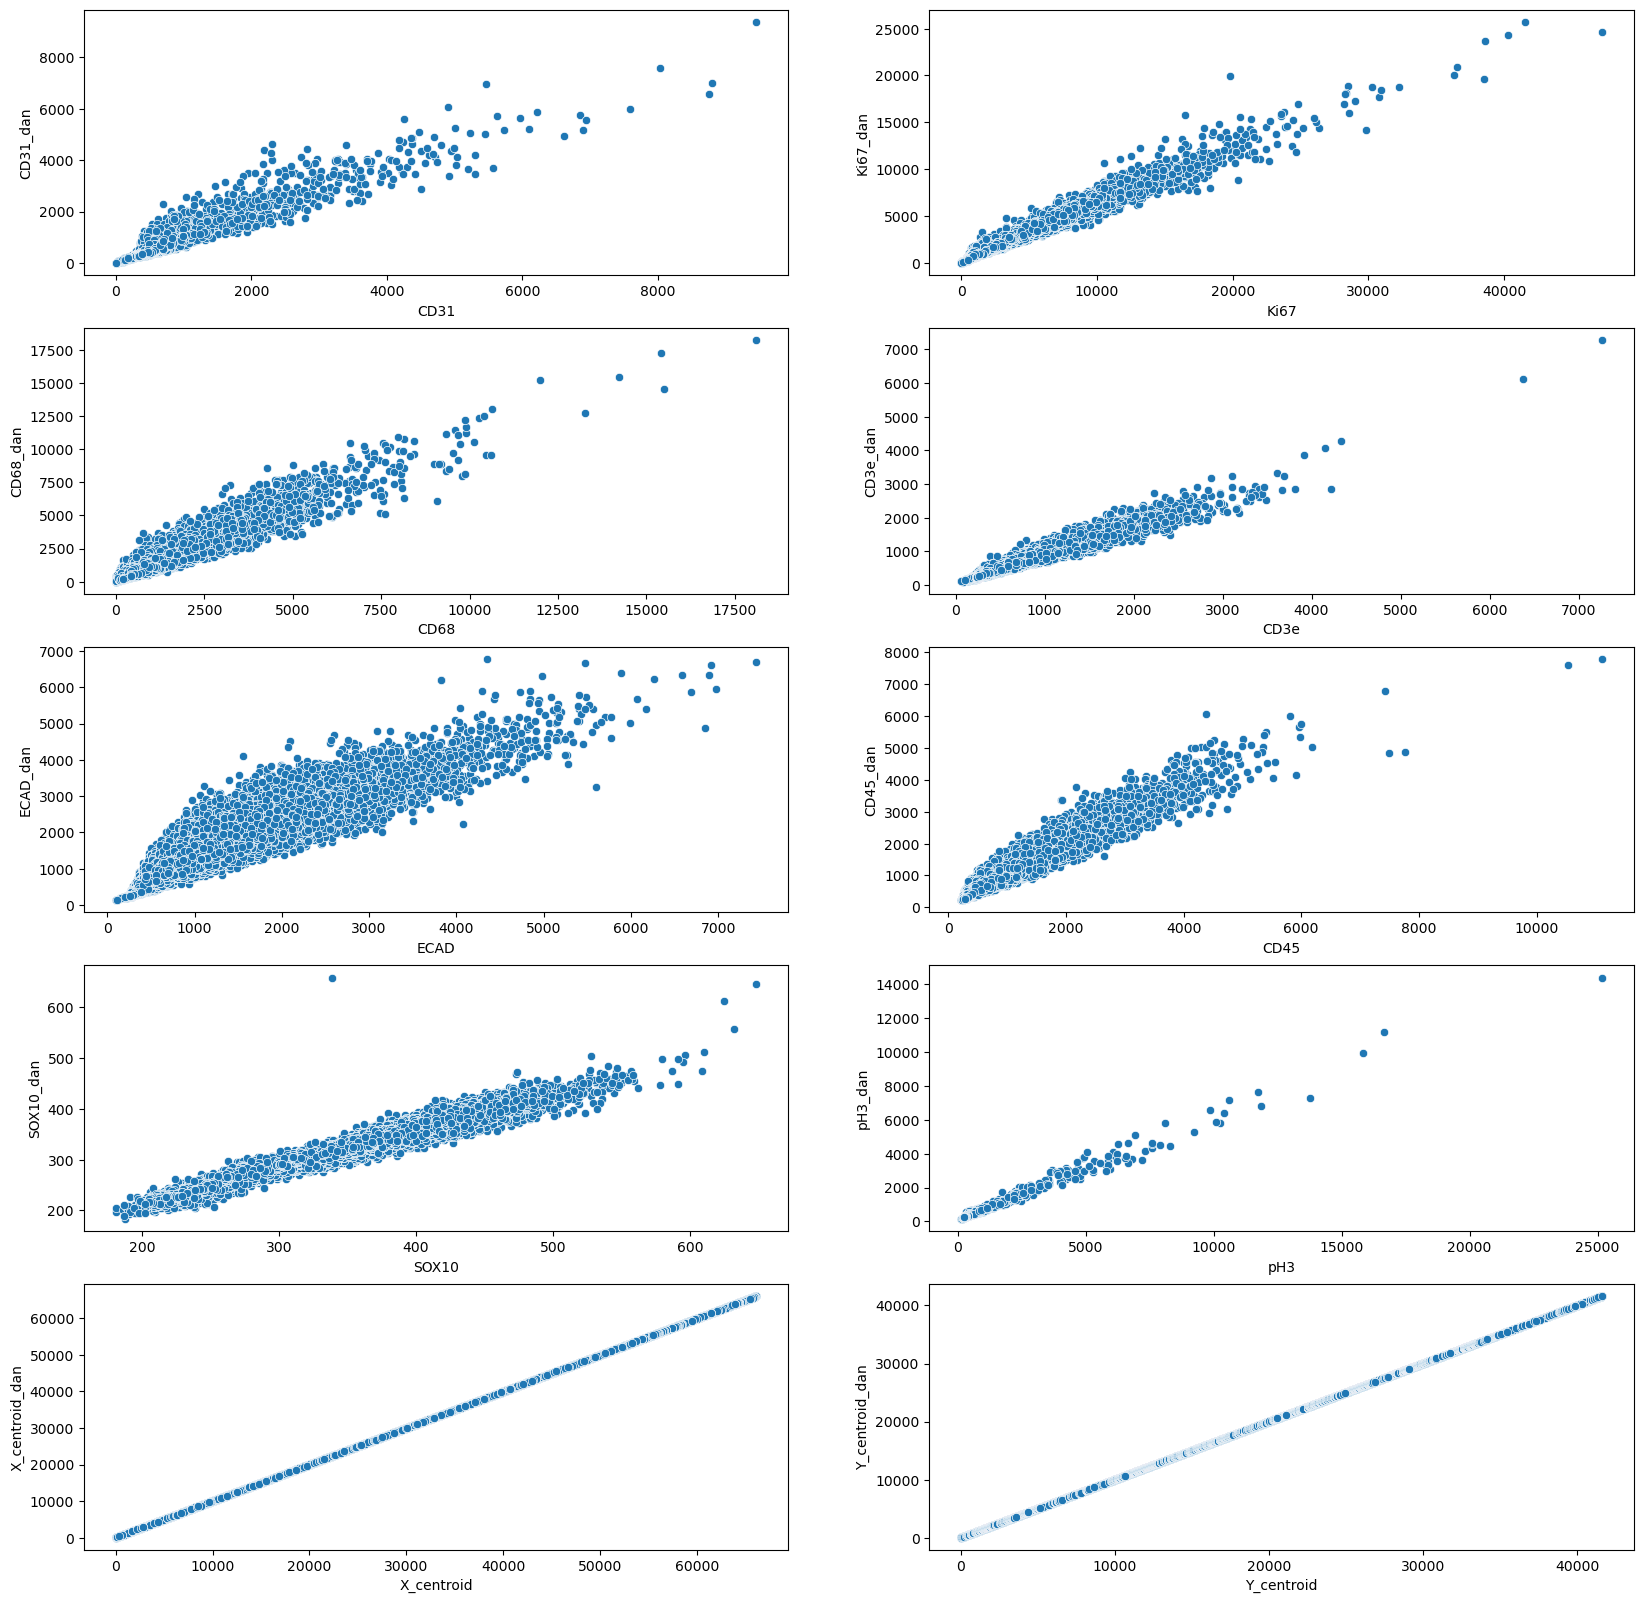

In [19]:
# Plot all shared columns in a grid of scatterplots

# Create a grid of subplots
n_features = len(shared_columns)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for i, feature in tqdm(enumerate(shared_columns)):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.scatterplot(data=merged_df, x=shared_columns[i], y=shared_columns[i]+'_dan',  ax=ax)

In [18]:
n_rows, n_cols

(5, 2)